I obtained data on Airbnbs in Edinburgh for both 2019/20 (compiled on 25th June 2019) and 2020/21 (compiled on 23rd June 2020). All of the data were collected by the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) project, although only the most recent year is available on their website. The 2019-20 data were sourced on [Kaggle](https://www.kaggle.com/thoroc/edinburgh-inside-airbnb). First, I take a first at the listings from the **2019/20** data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Looking at the 2019-20 Data 

First I will look at the listings of 13,245 properties. The listings tables are extremely dense, and could be used to generate even more data as they contain large blocks of text (e.g. room descriptions). A key thing to note is that the availability column is of limited use, because Airbnb does not differentiate between a booked lets and lets listed as unavailable by hosts (e.g. because the host is staying in the property at that time). 

In [4]:
listings_summary = pd.read_csv('../data19/listings-summary.csv')
listings_summary.shape
list(listings_summary.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [77]:
listings_summary.neighbourhood.value_counts()

Old Town, Princes Street and Leith Street    951
Tollcross                                    624
Deans Village                                575
Meadows and Southside                        526
Dalry and Fountainbridge                     479
                                            ... 
Currie East                                   15
Oxgangs                                       14
Barnton, Cammo and Cramond South              13
Moredun and Craigour                          11
Queensferry West                               9
Name: neighbourhood, Length: 111, dtype: int64

In [78]:
listings_summary.room_type.value_counts()

Entire home/apt    8289
Private room       4884
Shared room          72
Name: room_type, dtype: int64

In [9]:
listings.isna().any().any()

True

In [79]:
listings_summary.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.324500e+04,1.324500e+04,0.0,13245.000000,13245.000000,13245.000000,13245.000000,13245.000000,11213.000000,13245.000000,13245.000000
mean,2.007724e+07,7.895519e+07,NaN,55.950495,-3.198244,125.897320,2.890449,37.725255,1.934130,5.448320,98.166478
std,9.844764e+06,7.367464e+07,NaN,0.016005,0.037258,390.113085,15.263121,63.908517,2.107862,16.770714,111.798509
min,1.542000e+04,3.307800e+04,NaN,55.864540,-3.418340,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.327911e+07,1.915174e+07,NaN,55.940560,-3.213760,50.000000,1.000000,2.000000,0.370000,1.000000,0.000000
50%,2.017184e+07,5.140714e+07,NaN,55.950920,-3.193960,75.000000,2.000000,12.000000,1.110000,1.000000,50.000000
75%,2.739792e+07,1.291968e+08,NaN,55.960860,-3.177350,119.000000,2.000000,45.000000,2.890000,3.000000,161.000000
max,3.606601e+07,2.711014e+08,NaN,55.991760,-3.078950,12345.000000,1000.000000,773.000000,19.150000,135.000000,365.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EA5706988>]],
      dtype=object)

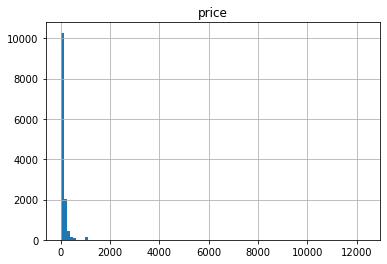

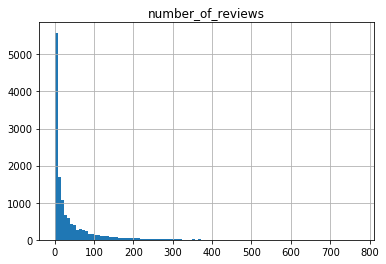

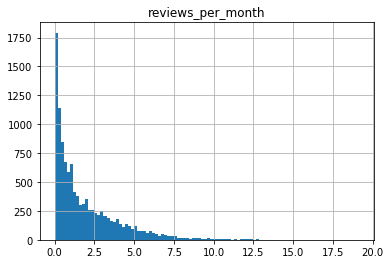

In [80]:
listings_summary.hist(column = 'price', bins = 100)
listings_summary.hist(column = 'number_of_reviews', bins = 100)
listings_summary.hist(column = 'reviews_per_month', bins = 100)

None of the continuous variables in the summary listings table correlate strongly with price. There are, however, large differences in the mean price of an Airbnb depending on the area it is located in.

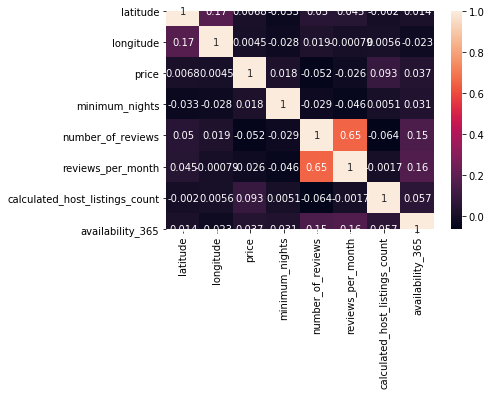

In [81]:
corrMatrix = listings_summary.drop(['id', 'host_id', 'neighbourhood_group', 'neighbourhood'], axis = 1).corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [82]:
listings_summary.groupby(by='neighbourhood')['price'].mean().sort_values()

neighbourhood
Hyvots and Gilmerton                          41.363636
Currie West                                   45.315789
Niddrie                                       46.750000
Mortonhall and Anwickhill                     47.888889
Granton South and Wardieburn                  48.250000
                                                ...    
Old Town, Princes Street and Leith Street    201.898002
Pilrig                                       214.228261
Dalry and Fountainbridge                     214.471816
The Calders                                  243.080000
Leith (Albert Street)                        326.223958
Name: price, Length: 111, dtype: float64

Now I move onto looking at the more detailed listings table. This requires reformatting of the price column.

In [7]:
listings = pd.read_csv('../data19/listings.csv')
listings.shape
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [84]:
def format_price(dataframe, column):
    dataframe[column] = dataframe[column].str.replace('$', '')
    dataframe[column] = dataframe[column].str.replace(',', '')
    dataframe[column] = pd.to_numeric(dataframe[column])

format_price(listings, "price")

I add a column that indicates whether an Airbnb has a real bed or not. I look for correlations between features such as bedrooms, bathrooms, and the number of people an Airbnb accomodates and its price. 

However, Airbnbs can also opt to charge extra for additional people staying in larger properties. The `price` column only refers to `guests_included`, and additional guests are charged at `extra_people`. Therefore, I can create another column which is price per included guest (`price_pig` = `price`/`guests_included`). I can also create a column that is price at full capacity (`price_fullcap` = `price` + `extra_people` * (`accomodates` - `guests_included`)). On 6 occassions this results in a negative number for `price_fullcap`, because the owner of the Airbnb has listed the price as including more individuals than the property can accomodate. In such cases, `price_fullcap` is just set to `price`.

In [85]:
listings.bed_type.value_counts()

listings['real_bed'] = listings['bed_type'].apply(lambda x: 1 if (x == 'Real Bed') else 0)
listings.real_bed.value_counts()

1    13120
0      125
Name: real_bed, dtype: int64

In [86]:
listings.guests_included.value_counts()
listings.extra_people.value_counts().head()

$0.00     8236
$15.00    1465
$10.00    1177
$20.00     653
$25.00     371
Name: extra_people, dtype: int64

In [87]:
listings = listings.assign(price_pig = lambda dataframe : dataframe['price']/dataframe['guests_included'])

format_price(listings, "extra_people")

listings = listings.assign(price_fullcap = lambda dataframe : dataframe['price'] + dataframe['extra_people'] * (dataframe['accommodates'] - dataframe['guests_included']))

listings.query('price_pig > price_fullcap')[['price_pig', 'price_fullcap', 'accommodates', 'price', 'extra_people', 'guests_included']]

listings['price_fullcap'] = np.where((listings.price_pig > listings.price_fullcap),listings.price,listings.price_fullcap)

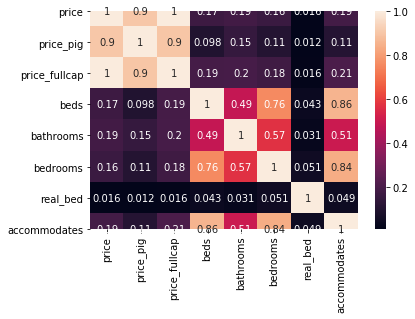

,price,price_pig,price_fullcap,beds,bathrooms,bedrooms,real_bed,accommodates
price,1.000000,0.904882,0.997855,0.170651,0.185875,0.163583,0.015974,0.187830
price_pig,0.904882,1.000000,0.901401,0.097650,0.151452,0.106743,0.012260,0.109344
price_fullcap,0.997855,0.901401,1.000000,0.190221,0.195775,0.176698,0.016478,0.208468
beds,0.170651,0.097650,0.190221,1.000000,0.488787,0.759699,0.042544,0.858349
bathrooms,0.185875,0.151452,0.195775,0.488787,1.000000,0.572819,0.031161,0.505610
bedrooms,0.163583,0.106743,0.176698,0.759699,0.572819,1.000000,0.051260,0.840446
real_bed,0.015974,0.012260,0.016478,0.042544,0.031161,0.051260,1.000000,0.049102
accommodates,0.187830,0.109344,0.208468,0.858349,0.505610,0.840446,0.049102,1.000000


In [88]:
corrMatrix = listings[['price', 'price_pig', 'price_fullcap', 'beds', 'bathrooms', 'bedrooms', 'real_bed', 'accommodates']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
corrMatrix

The `space` column contains additional details on amenities that may be extra to what is in the true `amenities` column. I imagine amenities (especially those like parking, wifi, etc.) have a strong influence on pricing, so I extract these into their own columns.

In [89]:
listings.amenities.head()

0    {TV,Internet,Wifi,"Wheelchair accessible",Kitc...
1    {TV,Wifi,Kitchen,"Paid parking off premises",E...
2    {TV,Internet,Wifi,"Wheelchair accessible",Kitc...
3    {TV,"Cable TV",Internet,Wifi,Kitchen,"Pets liv...
4    {TV,Wifi,Kitchen,"Paid parking off premises",H...
Name: amenities, dtype: object

In [90]:
def countAmenities(search_term, col_name):
    listings[col_name] = listings['amenities'].apply(lambda x: 1 if search_term in x else 0)
    return(listings)

amenitiesDict = {
    "pets": "Pets allowed",
    "children": "Family/kid friendly",
    "aircon": "Air conditioning",
    "wifi": "Wifi",
    "washer": "Washer",
    "garden": "Garden or backyard",
    "oven": "Oven",
    "gym": "Gym",
    "tv": "TV",
    "cable": "Cable TV",
    "free_parking": "Free parking on premises",
    "breakfast": "Breakfast",
    "dishwasher": "Dishwasher",
    "crib": "Crib",
    "workspace": "Laptop friendly workspace",
    "lift": "Elevator",
    "wheelchair_access": "Wheelchair accessible",
    "balcony": "Patio or balcony",
    "bathtub": "Bathtub",
    "lugagge_dropoff": "Luggage dropoff allowed",
    "self_checkin": "Self check-in",
    "dryer": "Dryer",
    "waterfront": "Waterfront",
    "fireplace": "Indoor fireplace"
}


for key in amenitiesDict:
    listings = countAmenities(amenitiesDict[key], key)
    print(listings[key].value_counts())

0    11963
1     1282
Name: pets, dtype: int64
0    8423
1    4822
Name: children, dtype: int64
0    13027
1      218
Name: aircon, dtype: int64
1    12756
0      489
Name: wifi, dtype: int64
1    11066
0     2179
Name: washer, dtype: int64
0    11485
1     1760
Name: garden, dtype: int64
0    8245
1    5000
Name: oven, dtype: int64
0    13042
1      203
Name: gym, dtype: int64
1    9500
0    3745
Name: tv, dtype: int64
0    11297
1     1948
Name: cable, dtype: int64
0    8880
1    4365
Name: free_parking, dtype: int64
0    10790
1     2455
Name: breakfast, dtype: int64
0    10623
1     2622
Name: dishwasher, dtype: int64
0    12599
1      646
Name: crib, dtype: int64
1    8807
0    4438
Name: workspace, dtype: int64
0    11848
1     1397
Name: lift, dtype: int64
0    12950
1      295
Name: wheelchair_access, dtype: int64
0    12459
1      786
Name: balcony, dtype: int64
0    12072
1     1173
Name: bathtub, dtype: int64
0    11118
1     2127
Name: lugagge_dropoff, dtype: int64
0    936

None of the amenities features are strongly correlated with price: their correlations are all less than 0.1. Features positively correlated with price are lifts, TVs, and dryers. Perhaps surprisingly, features negatively correlated with price are breakfast and free parking. It could be that those who offer breakfast and free parking tend to be located further out of the city, or are more likely to be chain hotels that can offer lower prices. 

In [91]:
corrMatrix = listings[["price", "price_pig", "price_fullcap"] + list(amenitiesDict.keys())].corr()
corrMatrix["price"].sort_values()
corrMatrix["price_pig"].sort_values()
corrMatrix["price_fullcap"].sort_values()

breakfast           -0.055546
free_parking        -0.033818
garden              -0.019827
lugagge_dropoff     -0.017736
self_checkin        -0.014073
pets                -0.013983
gym                 -0.007220
wheelchair_access   -0.006824
wifi                -0.005963
cable               -0.002773
bathtub             -0.002542
aircon               0.001919
fireplace            0.004415
balcony              0.006371
oven                 0.011258
waterfront           0.011490
washer               0.014629
workspace            0.016978
dishwasher           0.028779
crib                 0.032679
children             0.041216
dryer                0.056167
tv                   0.060504
lift                 0.086011
price_pig            0.901401
price                0.997855
price_fullcap        1.000000
Name: price_fullcap, dtype: float64

The columns `space`, `description`, `neighborhood_overview`, `summary` and `notes` offer large prose added by the owners of the Airbnb. At this moment in time, given the poor correlation of amenities with price, I will not extract any more details from these descriptions.

In [92]:
listings.space.value_counts()
listings.description.value_counts()
listings.summary.value_counts()
listings.neighborhood_overview.value_counts()
listings.notes.value_counts()

Check-in time is after 3pm and check-out time is before 11am.  Please note that you will be charged £100 for lost keys, so please be careful with them.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      35
Please note we do charge a £30 late check in fee between 10PM and 12AM and £50 between 12AM and 7AM. If you require additional cleans/ linens during your stay for a fee, please contact us. Also note that we charge £50 for each set of lost keys (security keys may cost more). For security purposes, there may be an additional cost to replace the

I collapse together the different housing categories so there are fewer. I also give each type is own column to in preparation for future analyses. Against intuition, apartments and hostels are weakly positively correlated with price, whereas homes and hotels are weakly negatively correlated. I suspect this could be due to the fact that hostels and flats tend to be more centrally located.

In [93]:
listings.property_type.value_counts()

listings['house'] = listings['property_type'].apply(lambda x: 1 if x in ['House', 'Cottage', 'Townhouse', 'Bungalow', 'Tiny house'] else 0)
listings.house.value_counts()

listings['apartment'] = listings['property_type'].apply(lambda x: 1 if x in ['Apartment', 'Serviced apartment', 'Condominium', 'Aparthotel'] else 0)
listings.apartment.value_counts()

listings['hotel'] = listings['property_type'].apply(lambda x: 1 if x in ['Boutique hotel', 'Guest suite', 'Guesthouse', 'Hotel', 'Bed and breakfast'] else 0)
listings.hotel.value_counts()

listings['hostel'] = listings['property_type'].apply(lambda x: 1 if x in ['Hostel'] else 0)
listings.hostel.value_counts()

listings['other_property_type'] = listings['property_type'].apply(lambda x: 1 if x in ['Loft', 'Villa', 'Camper/RV', 'Other', 'Tent', 'Cabin', 'Campsite', 'Chalet', 'Hut', 'Casa particular (Cuba)', 'Farm stay', 'Barn', 'Boat'] else 0)
listings.other_property_type.value_counts()

0    13121
1      124
Name: other_property_type, dtype: int64

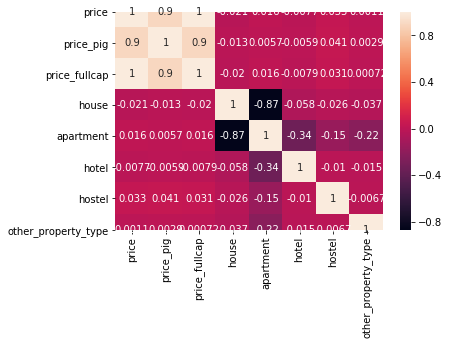

,price,price_pig,price_fullcap,house,apartment,hotel,hostel,other_property_type
price,1.000000,0.904882,0.997855,-0.020993,0.015728,-0.007705,0.032549,0.001145
price_pig,0.904882,1.000000,0.901401,-0.012881,0.005689,-0.005947,0.041111,0.002854
price_fullcap,0.997855,0.901401,1.000000,-0.020341,0.015572,-0.007909,0.031220,0.000720
house,-0.020993,-0.012881,-0.020341,1.000000,-0.866275,-0.057703,-0.026449,-0.037493
apartment,0.015728,0.005689,0.015572,-0.866275,1.000000,-0.336062,-0.154038,-0.218356
hotel,-0.007705,-0.005947,-0.007909,-0.057703,-0.336062,1.000000,-0.010261,-0.014545
hostel,0.032549,0.041111,0.031220,-0.026449,-0.154038,-0.010261,1.000000,-0.006667
other_property_type,0.001145,0.002854,0.000720,-0.037493,-0.218356,-0.014545,-0.006667,1.000000


In [94]:
corrMatrix = listings[['price', 'price_pig', 'price_fullcap', 'house', 'apartment', 'hotel', 'hostel', 'other_property_type']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
corrMatrix

In [95]:
listings.bathrooms.value_counts()
listings.bedrooms.value_counts()
listings.beds.value_counts()
listings.accommodates.value_counts()

2     5390
4     3451
6     1386
1      754
3      754
5      640
8      373
7      181
10     133
9       59
12      39
16      36
11      20
14      14
15       7
13       7
19       1
Name: accommodates, dtype: int64

I one hot encode the neighbourhoods.

In [96]:
areas = pd.get_dummies(listings.neighbourhood, prefix='Area')
areas['id'] = listings['id']
listings = listings.merge(areas, on = 'id')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,Area_Leith,Area_Marchmont,Area_Morningside,Area_New Town,Area_Newington,Area_Old Town,Area_Southside,Area_Stockbridge,Area_Tollcross,Area_West End
0,15420,https://www.airbnb.com/rooms/15420,20190625184115,2019-06-25,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...",This is a huge and luxurious apartment for 2 -...,"Stunning, impeccably refurbished spacious grou...",none,"The neighbourhood is in the historic New Town,...",...,0,0,0,1,0,0,0,0,0,0
1,24288,https://www.airbnb.com/rooms/24288,20190625184115,2019-06-25,"Cool central Loft, sleeps 4, 2 double bed+en-s...",Boho rustic-chic former warehouse Loft located...,"Two bedroom, very central Loft apartment with ...",Boho rustic-chic former warehouse Loft located...,none,It's all in the mix: Culture-museums and galle...,...,0,0,0,0,0,0,1,0,0,0
2,38628,https://www.airbnb.com/rooms/38628,20190625184115,2019-06-26,Edinburgh Holiday Let,Brunstane - Daiches Braes (close to Portobello...,Check out (Website hidden by Airbnb) Free Wi-...,Brunstane - Daiches Braes (close to Portobello...,none,Quiet and easy access to outside.,...,0,0,0,0,0,0,0,0,0,0
3,44552,https://www.airbnb.com/rooms/44552,20190625184115,2019-06-25,Double room - spacious Leith flat,Pleasant double room in 2 bedroom ground floor...,You will be staying in a pleasant double room ...,Pleasant double room in 2 bedroom ground floor...,none,NaN,...,1,0,0,0,0,0,0,0,0,0
4,47616,https://www.airbnb.com/rooms/47616,20190625184115,2019-06-25,"City flat, close to nature and the Fringe",Annemarie & I would like to welcome you to our...,The flat has two floors with bedrooms and bath...,Annemarie & I would like to welcome you to our...,none,We're at the quiet end of a residential street...,...,0,0,0,0,0,0,1,0,0,0


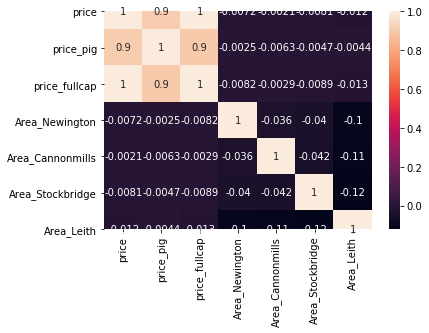

,price,price_pig,price_fullcap,Area_Newington,Area_Cannonmills,Area_Stockbridge,Area_Leith
price,1.000000,0.904882,0.997855,-0.007192,-0.002134,-0.008133,-0.012336
price_pig,0.904882,1.000000,0.901401,-0.002510,-0.006281,-0.004706,-0.004365
price_fullcap,0.997855,0.901401,1.000000,-0.008165,-0.002878,-0.008920,-0.012856
Area_Newington,-0.007192,-0.002510,-0.008165,1.000000,-0.036097,-0.039871,-0.103081
Area_Cannonmills,-0.002134,-0.006281,-0.002878,-0.036097,1.000000,-0.041984,-0.108542
Area_Stockbridge,-0.008133,-0.004706,-0.008920,-0.039871,-0.041984,1.000000,-0.119892
Area_Leith,-0.012336,-0.004365,-0.012856,-0.103081,-0.108542,-0.119892,1.000000


In [97]:
corrMatrix = listings[['price', 'price_pig', 'price_fullcap', 'Area_Newington', 'Area_Cannonmills', 'Area_Stockbridge', 'Area_Leith']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
corrMatrix

In [103]:
listings = listings.drop(listings.iloc[:, 1:19], axis = 1)
listings = listings.drop(listings.columns[listings.columns.str.contains('nights')], axis=1)

for column in listings.columns:
    print(column)

id
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
requires_license
license
jurisdiction_names
instant_bookable
is_business_travel_ready
cancellation_policy
require_guest_profile_picture
require_guest_phone_verification
calculated_host_listings_count
calculated_host_listings_count_entire_homes
calculated_host_listings_count_private_rooms
cal

## Looking at the 2020-21 Data

Of the 13,245 properties in the 2019-21 dataset, 9945 of these are also present in the 2020-21 dataset.

In [23]:
listings20 = pd.read_csv('../data20/listings.csv')

for key in amenitiesDict:
    listings20 = countAmenities(amenitiesDict[key], key)
    
listings20 = listings20.merge(areas, on = 'id')

format_price(listings, "price")
format_price(listings, "extra_people")

listings20.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,Area_Leith,Area_Marchmont,Area_Morningside,Area_New Town,Area_Newington,Area_Old Town,Area_Southside,Area_Stockbridge,Area_Tollcross,Area_West End
0,15420,https://www.airbnb.com/rooms/15420,20200623173438,2020-06-24,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...",This is a huge and luxurious apartment for 2 -...,"Stunning, impeccably refurbished spacious grou...",none,"The neighbourhood is in the historic New Town,...",...,0,0,0,1,0,0,0,0,0,0
1,24288,https://www.airbnb.com/rooms/24288,20200623173438,2020-06-24,"Cool central Loft, sleeps 4, 2 double bed+en-s...",Boho rustic-chic former warehouse Loft located...,"Two bedroom, very central Loft apartment with ...",Boho rustic-chic former warehouse Loft located...,none,It's all in the mix: Culture-museums and galle...,...,0,0,0,0,0,0,1,0,0,0
2,38628,https://www.airbnb.com/rooms/38628,20200623173438,2020-06-24,Edinburgh Holiday Let,Brunstane - Daiches Braes (close to Portobello...,Check out (Website hidden by Airbnb) Free Wi-...,Brunstane - Daiches Braes (close to Portobello...,none,Quiet and easy access to outside.,...,0,0,0,0,0,0,0,0,0,0
3,44552,https://www.airbnb.com/rooms/44552,20200623173438,2020-06-24,Double room - spacious Leith flat,Pleasant double room in 2 bedroom ground floor...,You will be staying in a pleasant double room ...,Pleasant double room in 2 bedroom ground floor...,none,NaN,...,1,0,0,0,0,0,0,0,0,0
4,47616,https://www.airbnb.com/rooms/47616,20200623173438,2020-06-24,"City flat, close to nature and the Fringe",Annemarie & I would like to welcome you to our...,The flat has two floors with bedrooms and bath...,Annemarie & I would like to welcome you to our...,none,We're at the quiet end of a residential street...,...,0,0,0,0,0,0,1,0,0,0


In [25]:
pd.merge(listings, listings20, on = 'id', how = 'inner')

,id,listing_url_x,scrape_id_x,last_scraped_x,name_x,summary_x,space_x,description_x,experiences_offered_x,neighborhood_overview_x,...,Area_Leith,Area_Marchmont,Area_Morningside,Area_New Town,Area_Newington,Area_Old Town,Area_Southside,Area_Stockbridge,Area_Tollcross,Area_West End
0,15420,https://www.airbnb.com/rooms/15420,20200623173438,2020-06-24,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...",This is a huge and luxurious apartment for 2 -...,"Stunning, impeccably refurbished spacious grou...",none,"The neighbourhood is in the historic New Town,...",...,0,0,0,1,0,0,0,0,0,0
1,24288,https://www.airbnb.com/rooms/24288,20200623173438,2020-06-24,"Cool central Loft, sleeps 4, 2 double bed+en-s...",Boho rustic-chic former warehouse Loft located...,"Two bedroom, very central Loft apartment with ...",Boho rustic-chic former warehouse Loft located...,none,It's all in the mix: Culture-museums and galle...,...,0,0,0,0,0,0,1,0,0,0
2,38628,https://www.airbnb.com/rooms/38628,20200623173438,2020-06-24,Edinburgh Holiday Let,Brunstane - Daiches Braes (close to Portobello...,Check out (Website hidden by Airbnb) Free Wi-...,Brunstane - Daiches Braes (close to Portobello...,none,Quiet and easy access to outside.,...,0,0,0,0,0,0,0,0,0,0
3,44552,https://www.airbnb.com/rooms/44552,20200623173438,2020-06-24,Double room - spacious Leith flat,Pleasant double room in 2 bedroom ground floor...,You will be staying in a pleasant double room ...,Pleasant double room in 2 bedroom ground floor...,none,NaN,...,1,0,0,0,0,0,0,0,0,0
4,47616,https://www.airbnb.com/rooms/47616,20200623173438,2020-06-24,"City flat, close to nature and the Fringe",Annemarie & I would like to welcome you to our...,The flat has two floors with bedrooms and bath...,Annemarie & I would like to welcome you to our...,none,We're at the quiet end of a residential street...,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9940,36059614,https://www.airbnb.com/rooms/36059614,20200623173438,2020-06-24,"The Knight Residence, 1 Bedroom City","Elegant and traditional apartment, which provi...","Located in the main building, facing on to Lau...","Elegant and traditional apartment, which provi...",none,To walk from Waverley station: walk west to th...,...,0,0,0,0,0,0,0,0,1,0
9941,36060353,https://www.airbnb.com/rooms/36060353,20200623173438,2020-06-24,"The Knight Residence, 2 Bedroom City","Elegant and traditional apartment, which provi...",Located in the main building facing overlookin...,"Elegant and traditional apartment, which provi...",none,To walk from Waverley station: walk west to th...,...,0,0,0,0,0,0,0,0,1,0
9942,36061191,https://www.airbnb.com/rooms/36061191,20200623173438,2020-06-24,"The Knight Residence, 1 Bedroom Comfort","Elegant and traditional apartment, which provi...",Located in our annex building these apartments...,"Elegant and traditional apartment, which provi...",none,To walk from Waverley station: walk west to th...,...,0,0,0,0,0,0,0,0,1,0
9943,36061722,https://www.airbnb.com/rooms/36061722,20200623173438,2020-06-24,"The Knight Residence, 2 Bedroom Comfort","Elegant and traditional apartment, which provi...",Located in our annex building these apartments...,"Elegant and traditional apartment, which provi...",none,To walk from Waverley station: walk west to th...,...,0,0,0,0,0,1,0,0,0,0


In [33]:
corr_matrix = listings20.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

sol

host_listings_count             host_total_listings_count                      1.000000e+00
maximum_maximum_nights          maximum_nights_avg_ntm                         9.955196e-01
minimum_maximum_nights          maximum_nights_avg_ntm                         9.950020e-01
calculated_host_listings_count  calculated_host_listings_count_entire_homes    9.935348e-01
minimum_minimum_nights          minimum_nights_avg_ntm                         9.929071e-01
                                                                                   ...     
scrape_id                       Area_Stockbridge                               1.547409e-16
                                review_scores_accuracy                         1.135993e-16
                                maximum_maximum_nights                         6.150043e-17
                                minimum_nights                                 3.684382e-17
                                Area_Southside                                 3

## Comparison of 2019-20 and 2020-21

In [ ]:
Look for associations between area and house type, amenities, etc 

## Prepare Datasets for Modelling

Acceptance rate is empty. Response time is a categorical variable, response rate is a % (% of individuals responded to).

In [102]:
listings.city.value_counts()

Edinburgh                           12958
Edinburgh                              90
Edimburgo                              20
Queensferry                            15
Currie                                 14
                                    ...  
Cramond Village, near Edinburgh         1
Edinburgh, Scotland, EH6 5PU            1
Kirkliston, Edinburgh                   1
Leith                                   1
Stockbridge, New Town, Edinburgh        1
Name: city, Length: 63, dtype: int64

So few do not have profile pictures it's probably not useful. Lisence is also not useful. Host location may be informative.

In [107]:
#listings.host_location.value_counts()
#listings.host_has_profile_pic.value_counts()
listings.review_scores_value.value_counts()

10.0    6481
9.0     3862
8.0      529
7.0       79
6.0       77
2.0       11
4.0       10
5.0        8
Name: review_scores_value, dtype: int64

In [248]:
listings.calculated_host_listings_count_entire_homes.value_counts()

1      5849
0      4127
2      1115
3       441
4       215
5       161
7       151
135     135
6       103
90       90
9        84
14       84
39       78
65       74
12       73
27       54
15       45
10       42
41       41
11       33
29       29
23       29
28       28
25       25
8        24
19       22
22       22
20       21
21       21
16       16
13       13
Name: calculated_host_listings_count_entire_homes, dtype: int64